# **STANDARD NOTEBOOK TO GET RESULTS**

## 1. Clean the Data

In [1]:
import pandas as pd 
import process
import numpy as np 
# Jerome path : r'C:\Users\33640\OneDrive\Documents\GitHub\Portfolio_clustering_project\Data\DataBase.csv'
# Nail path : '/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Data/DataBase.csv'
df = pd.read_csv(r'/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Data/DataBase.csv')

df.set_index('ticker', inplace=True)

df.columns = pd.to_datetime(df.columns.str[1:], format='%Y%m%d').strftime('%d/%m/%Y')

df_cleaned = df.fillna(0) # Utilisez la méthode fillna(0) pour remplacer les NaN par 0

df_cleaned = df_cleaned.transpose() ## WE WANT COLUMNS TO BE VECTOR OF RETURN FOR A GIVEN TICKER

In [117]:
df_cleaned.iloc[:, 3016:3265] ## 2012 - 2013

,03/01/2012,04/01/2012,05/01/2012,06/01/2012,09/01/2012,10/01/2012,11/01/2012,12/01/2012,13/01/2012,17/01/2012,...,17/12/2012,18/12/2012,19/12/2012,20/12/2012,21/12/2012,24/12/2012,26/12/2012,27/12/2012,28/12/2012,31/12/2012
ticker,,,,,,,,,,,,,,,,,,,,,
AA,0.031923,0.034449,0.003210,0.008772,0.017662,-0.027170,0.017811,0.011139,-0.003057,-0.021288,...,-0.002283,0.018121,-0.022884,0.008079,-0.009292,0.010496,0.010363,-0.014969,-0.008202,0.018605
ABM,-0.009058,-0.003389,-0.014240,0.009376,-0.004909,0.011566,0.006258,0.004305,0.000483,-0.024179,...,-0.001480,0.011283,-0.002461,0.000984,-0.002471,-0.000995,-0.002489,-0.008016,-0.013191,0.015661
ABT,0.002471,-0.004063,-0.002481,-0.011215,-0.002682,-0.001603,-0.004142,-0.008844,0.007242,-0.003584,...,-0.005811,0.012208,-0.009747,0.002291,0.012799,-0.008820,-0.007503,0.001231,-0.005573,0.021138
ADI,-0.011864,-0.000833,0.011410,-0.005833,0.019032,-0.002717,0.009528,0.008343,-0.011674,0.002974,...,0.003134,0.009772,-0.001889,-0.000944,0.005943,0.001902,-0.009289,0.000478,-0.004091,0.014127
ADM,-0.010331,0.011644,0.003426,-0.003091,-0.006551,-0.011057,0.009028,0.007233,0.007916,-0.024710,...,0.012491,0.024150,-0.006433,0.000357,-0.002157,0.002165,-0.009060,0.001820,-0.010660,0.014341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XLY,-0.008099,0.009628,0.013849,0.000999,-0.004242,-0.001986,0.003230,0.000990,0.004468,-0.002959,...,0.016278,0.008534,-0.009556,0.002920,0.005727,0.003599,-0.012309,-0.000426,-0.003220,0.022779
XOM,0.000349,0.002677,0.001400,-0.009355,0.005865,-0.004075,-0.000235,0.004139,0.008519,-0.000700,...,0.005755,0.009085,-0.012402,0.005754,-0.004917,-0.002413,-0.001607,-0.002185,-0.011682,0.017601
XRX,0.004890,-0.004896,0.000000,-0.006154,-0.006161,-0.002463,0.011050,-0.012225,0.002478,-0.007398,...,-0.007179,0.024166,-0.012667,0.011284,0.005690,-0.004289,-0.010094,-0.013168,-0.002985,0.024191


## 2. Run the code

Once the run is completed, you have: 
* the overall return -> overall return
* the PnL associated to the strategy
* the daily PnL associated to the strategy
* the Sharpe Ratio associated to the strategy

In [2]:
import warnings 
from PyFolioC import PyFolioC
warnings.filterwarnings("ignore") ## so that there are no polluting warnings as output of this cell

##################################################################### PARAMETERS #####################################################################
historical_data = df_cleaned
number_of_repetitions = 10
lookback_window = [2262,2512] ## so that the difference is a multiple of 5 --> year 2016
evaluation_window = 5
number_of_clusters = 38
cov_method = 'SPONGE'
sigma = 0.01
eta = 0.01

beta = 0.95
K = 4  # Number of fold for the cross validation
######################################################################################################################################################

##################################################################### PORTFOLIO ######################################################################
portfolio = PyFolioC(number_of_repetitions=number_of_repetitions, historical_data=historical_data, lookback_window=lookback_window, evaluation_window=evaluation_window, number_of_clusters=number_of_clusters, sigma=sigma, eta=eta, short_selling=False, cov_method=cov_method)


## year 2008-2009 ==> 2007:2262 if evaluation_window == 2
## year 2008-2009 ==> 2007:2265 if evaluation_window == 5
## year 2012-2013 ==> 3016:3265
## year 2018-2019 ==> 4524:4774
## year 2016-2019 ==> 4021:4774
## year 2010-2020 ==> 2512:5279 (we go until 5277 to have a multiple of 5 for the difference)

In [3]:
overall_return, PnL, portfolio_value, daily_PnL = portfolio.sliding_window(500) ## 150 --> 3 years

step 1/500, portfolio value: 1.0054
step 2/500, portfolio value: 1.0050
step 3/500, portfolio value: 1.0015
step 4/500, portfolio value: 1.0006
step 5/500, portfolio value: 0.9975
step 6/500, portfolio value: 1.0042
step 7/500, portfolio value: nan
step 8/500, portfolio value: nan
step 9/500, portfolio value: nan
step 10/500, portfolio value: nan
step 11/500, portfolio value: nan
step 12/500, portfolio value: nan
step 13/500, portfolio value: nan
step 14/500, portfolio value: nan
step 15/500, portfolio value: nan
step 16/500, portfolio value: nan
step 17/500, portfolio value: nan
step 18/500, portfolio value: nan
step 19/500, portfolio value: nan
step 20/500, portfolio value: nan
step 21/500, portfolio value: nan
step 22/500, portfolio value: nan
step 23/500, portfolio value: nan
step 24/500, portfolio value: nan
step 25/500, portfolio value: nan
step 26/500, portfolio value: nan
step 27/500, portfolio value: nan
step 28/500, portfolio value: nan
step 29/500, portfolio value: nan
step 

KeyboardInterrupt: 

## 3. Save the results to csv files (APPLY THE CELLS ONLY ONCE AS IT CREATES 3 FILES !!)

In [78]:
year = '2013-24_05_2016'
clustering_method = 'SPONGE'

## process.save_to_csv(year=year, clustering_method=clustering_method)

df_daily = pd.DataFrame(daily_PnL, columns=['Daily PnL'])

df_daily.to_csv(f'daily_{year}_{clustering_method}_{evaluation_window}_{len(lookback_window_0)}.csv', index=False)

df_PnL = pd.DataFrame(PnL, columns=['PnL'])

df_PnL.to_csv(f'PnL_{year}_{clustering_method}_{evaluation_window}_{len(lookback_window_0)}.csv', index=False)

df_overall_return = pd.DataFrame(overall_return.values, columns=['Return'])

df_overall_return.to_csv(f'Overall_return_{year}_{clustering_method}_{evaluation_window}_{len(lookback_window_0)}.csv', index=False)


## 4. Get SP500 data for comparison

In [112]:
import yfinance as yf

start_date = '2016-05-25'
end_date = '2019-11-29'

sp500_PnL = process.get_sp500_PnL(start_date, end_date)

print(len(sp500_PnL))

[*********************100%%**********************]  1 of 1 completed
885


## 5. Plot Portfolio Cumulative PnL vs SP500 Cumulative PnL

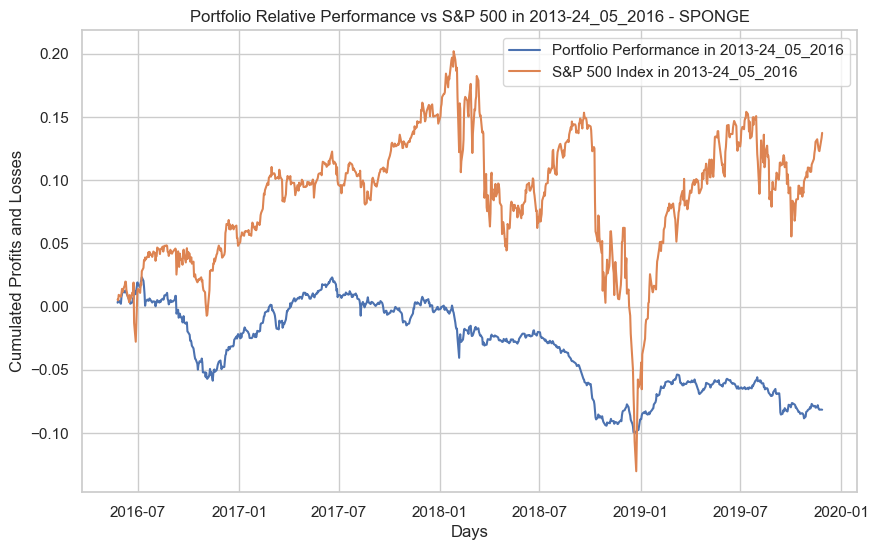

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate the cumulative returns
portfolio_cumulative = pd.DataFrame(index = sp500_PnL.index, columns=[f'Portfolio Performance in {year}'], data=PnL)

# Set Seaborn style
sns.set(style="whitegrid")

# Plot the relative performance using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=portfolio_cumulative)
sns.lineplot(data=sp500_PnL.cumsum(), label=f'S&P 500 Index in {year}')
plt.xlabel('Days')
plt.ylabel('Cumulated Profits and Losses')
plt.title(f'Portfolio Relative Performance vs S&P 500 in {year} - {clustering_method}')
plt.legend()
plt.show()

# 6. Plot portfolio value alone

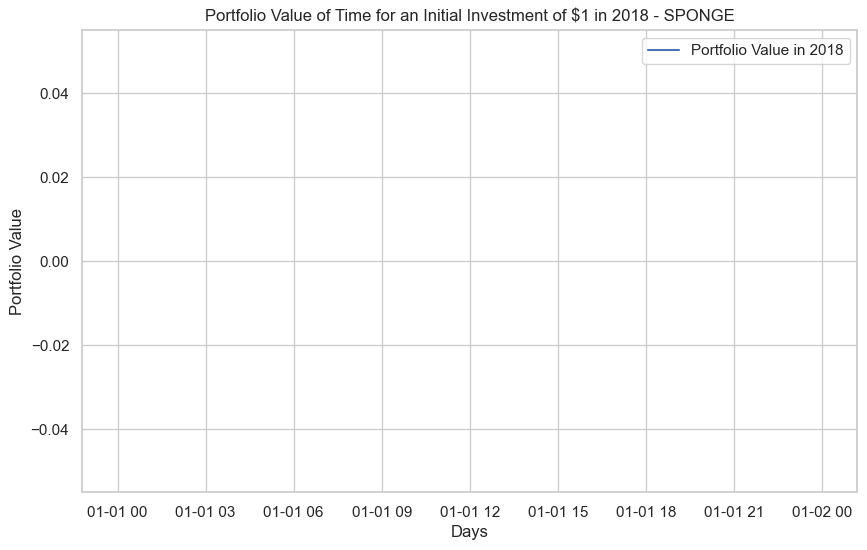

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Création de l'axe des abscisses (nombre de jours)

portfolio_value = pd.DataFrame(index = sp500_PnL.index, columns=[f'Portfolio Value in {year}'], data=portfolio_value)

# Configuration de seaborn pour un style agréable
sns.set(style="whitegrid")

# Tracer la PnL cumulative avec seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(portfolio_value, color='blue')

# Ajouter des titres et des légendes
plt.title(f'Portfolio Value of Time for an Initial Investment of $1 in {year} - {clustering_method}')
plt.xlabel('Days')
plt.ylabel('Portfolio Value')

# Afficher le graphique
plt.show()

# 7. Barplot Daily PnL vs SP500

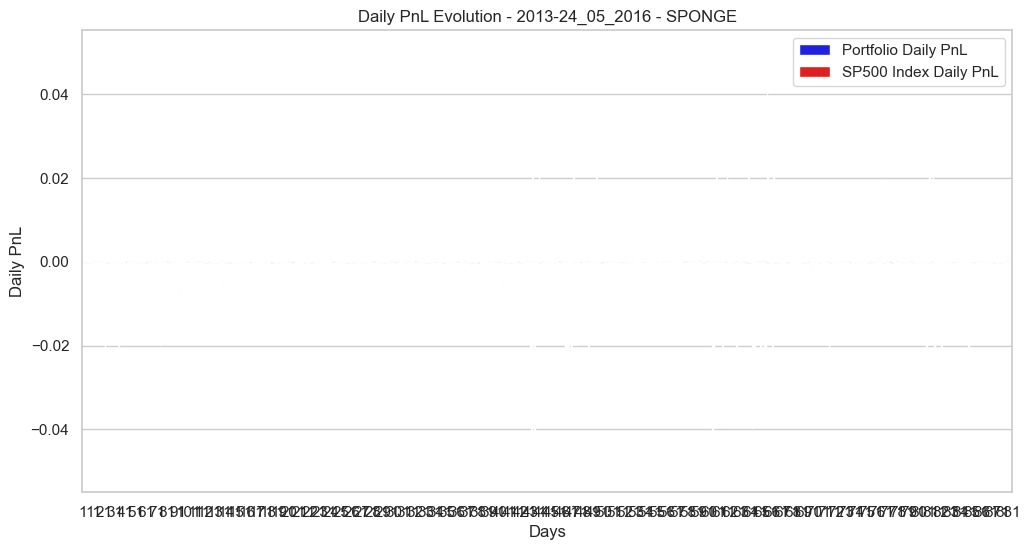

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Création de l'axe des abscisses (nombre de jours)
days = np.arange(1, len(daily_PnL) + 1)

# Configuration de seaborn pour un style agréable
sns.set(style="whitegrid")

# Tracer l'évolution quotidienne de la PnL sous forme de diagramme à barres avec seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=days, y=daily_PnL, color='blue', width=0.8, label='Portfolio Daily PnL')  # Ajustez la largeur ici
ax = sns.barplot(x=days, y=sp500_PnL, color='red', width=0.8, label='SP500 Index Daily PnL')

# Rotation des étiquettes de l'axe des abscisses de 45 degrés avec un ajustement
ax.set_xticks(np.arange(0, len(days), step=10))

# Ajouter des titres et des légendes
plt.title(f'Daily PnL Evolution - {year} - {clustering_method}')
plt.xlabel('Days')
plt.ylabel('Daily PnL')
plt.legend()

# Afficher le graphique
plt.show()

# 8. Plot everything (SPONGE vs Signed Laplacian vs SP500)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Calculate the cumulative returns
portfolio_cumulative_SL = pd.DataFrame(index=sp500_PnL.iloc[:-1].index, columns=['Signed Laplacian Portfolio Performance in 2017'], data=PnL)
portfolio_cumulative_SPONGE = pd.DataFrame(index=sp500_PnL.iloc[:-1].index, columns=['SPONGE Portfolio Performance in 2017'], data=PnL_SPONGE.values)

# Combine dataframes for seaborn plotting
combined_df = pd.concat([portfolio_cumulative_SL, portfolio_cumulative_SPONGE, sp500_PnL.cumsum()], axis=1)
combined_df.columns = ['Signed Laplacian', 'SPONGE', 'S&P 500 Index in 2017']

# Set Seaborn style
sns.set(style="whitegrid")

# Plot the relative performance using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_df, palette=['blue', 'red', 'green'])
plt.xlabel('Days')
plt.ylabel('Cumulated Profits and Losses')
plt.title('Portfolio Relative Performance vs S&P 500 in 2017')
plt.legend()
plt.show()

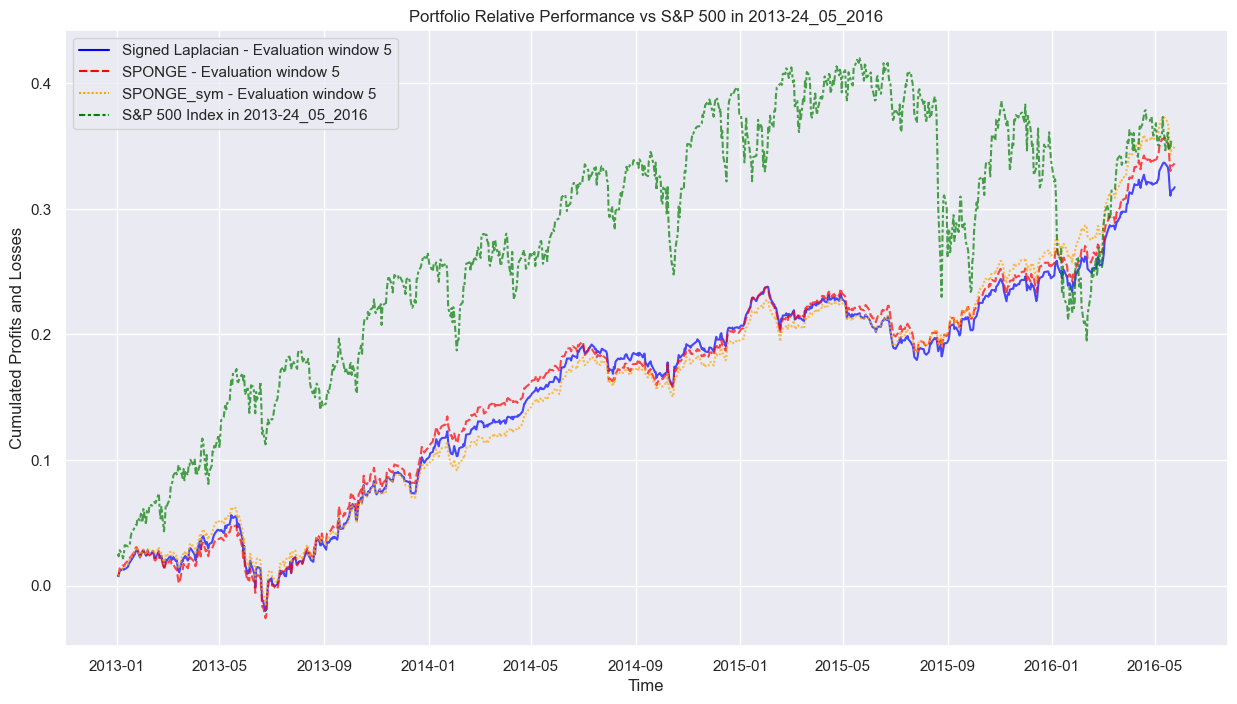

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

PnL_SPONGE_5 = pd.read_csv('/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Outputs/2013-2016/PnL_2013-24_05_2016_SPONGE_5_2.csv')
PnL_SPONGE_1 = pd.read_csv('/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Outputs/2018/PnL_2018_SPONGE_1.csv')
PnL_SPONGE_sym_5 = pd.read_csv('/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Outputs/2013-2016/PnL_2013-24_05_2016_SPONGE_sym_5_2.csv')
PnL_SL_5 = pd.read_csv('/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Outputs/2013-2016/PnL_2013-24_05_2016_signed_laplacian_5_2.csv')

#PnL_SPONGE_5_2 = pd.read_csv('/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Outputs/2019/PnL_2019_SPONGE_5_2.csv')
#PnL_SPONGE_sym_5_2 = pd.read_csv('/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Outputs/2019/PnL_2019_SPONGE_sym_5_2.csv')
#PnL_SL_5_2 = pd.read_csv('/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Outputs/2019/PnL_2019_signed_laplacian_5_2.csv')

# Calculate the cumulative returns
portfolio_cumulative_SL_5 = pd.DataFrame(index=sp500_PnL.index, columns=[f'Signed Laplacian Portfolio Performance in {year}'], data=PnL_SL_5.values)
portfolio_cumulative_SPONGE_5 = pd.DataFrame(index=sp500_PnL.index, columns=[f'SPONGE Portfolio Performance in {year}'], data=PnL_SPONGE_5.values)
portfolio_cumulative_SPONGE_sym_5 = pd.DataFrame(index=sp500_PnL.index, columns=[f'Symmetric SPONGE Portfolio Performance in {year}'], data=PnL_SPONGE_sym_5.values)

# portfolio_cumulative_SL_5_2 = pd.DataFrame(index=sp500_PnL.iloc[:-1].index, columns=[f'Signed Laplacian Portfolio Performance in {year}'], data=PnL_SL_5_2.values)
# portfolio_cumulative_SPONGE_5_2 = pd.DataFrame(index=sp500_PnL.iloc[:-1].index, columns=[f'SPONGE Portfolio Performance in {year}'], data=PnL_SPONGE_5_2.values)
# portfolio_cumulative_SPONGE_sym_5_2 = pd.DataFrame(index=sp500_PnL.iloc[:-1].index, columns=[f'Symmetric SPONGE Portfolio Performance in {year}'], data=PnL_SPONGE_sym_5_2.values)

# Combine dataframes for seaborn plotting
## combined_df = pd.concat([portfolio_cumulative_SL_5, portfolio_cumulative_SL_5_2, portfolio_cumulative_SPONGE_5, portfolio_cumulative_SPONGE_5_2, portfolio_cumulative_SPONGE_sym_5, portfolio_cumulative_SPONGE_sym_5_2, sp500_PnL.iloc[:-1].cumsum()], axis=1)
combined_df = pd.concat([portfolio_cumulative_SL_5, portfolio_cumulative_SPONGE_5, portfolio_cumulative_SPONGE_sym_5, sp500_PnL.iloc[:-2].cumsum()], axis=1)
combined_df.columns = [f'Signed Laplacian - Evaluation window {evaluation_window}', f'SPONGE - Evaluation window {evaluation_window}', f'SPONGE_sym - Evaluation window {evaluation_window}', f'S&P 500 Index in {year}']

# Set Seaborn style
sns.set(style="darkgrid")

# Plot the relative performance using Seaborn
plt.figure(figsize=(15, 8))
sns.lineplot(data=combined_df, palette=['blue', 'red', 'orange', 'green'], alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Cumulated Profits and Losses')
plt.title(f'Portfolio Relative Performance vs S&P 500 in {year}')
plt.legend()
plt.show()